In [8]:
import pandas as pd
from matplotlib import pyplot as plt

from math import sqrt
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv1D
from keras.layers import Conv2D 
from keras.layers import MaxPool2D
from keras.layers import MaxPool1D
from keras.regularizers import l1, l2

#### Loading the data

In [9]:
X_test = pd.read_csv("../out/t_x_test.csv")
X_train = pd.read_csv("../out/t_x_train.csv")
y_test = pd.read_csv("../out/t_y_test.csv")
y_train = pd.read_csv("../out/t_y_train.csv")

X_test_no_outlier = pd.read_csv("../out/no_outlier_t_x_test.csv")
X_train_no_outlier = pd.read_csv("../out/no_outlier_t_x_train.csv")
y_test_no_outlier = pd.read_csv("../out/no_outlier_t_y_test.csv")
y_train_no_outlier = pd.read_csv("../out/no_outlier_t_y_train.csv")

kaggle_train_X = pd.read_csv("../out/train_X.csv")
kaggle_train_y = pd.read_csv("../out/train_Y.csv")
kaggle_train_X_no_outlier = pd.read_csv("../out/no_outlier_train_X.csv")
kaggle_train_y_no_outlier = pd.read_csv("../out/no_outlier_train_Y.csv")

kaggle_test_X = pd.read_csv("../out/kaggle_test_X.csv", index_col='Id')

(X_test.shape, X_train.shape, y_test.shape, y_train.shape, X_test_no_outlier.shape, X_train_no_outlier.shape, y_test_no_outlier.shape, y_train_no_outlier.shape)


((292, 270),
 (1167, 270),
 (292, 1),
 (1167, 1),
 (224, 270),
 (892, 270),
 (224, 1),
 (892, 1))

#### Helper methods

In [10]:
def visualize_history(h, title): 
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title(title)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='lower left')
    plt.show()

#### Trying out models

<hr/>

##### Model 1

In [11]:
model1 = Sequential()
model1.add(Dense(256, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1(0.001)))
model1.add(Dense(128, input_shape=(256,), activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(64, input_shape=(128,), activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1, input_shape=(64,), activation='linear'))

In [12]:
model1.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               69376     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 110,593
Trainable params: 110,593
Non-trainable params: 0
________________________________________________

##### Training with data containing outliers

In [14]:
hist = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)

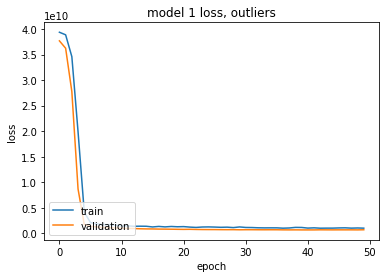

In [15]:
visualize_history(hist, 'model 1 loss, outliers')

In [16]:
f"Score: {sqrt(mean_squared_error(y_test, model1.predict(X_test)))}"

'Score: 26281.50435934881'

##### Training with data containing no outliers

In [17]:
hist = model1.fit(X_train_no_outlier, y_train_no_outlier, validation_data=(X_test, y_test), epochs=50, verbose=0)

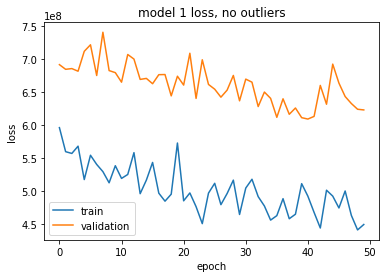

In [18]:
visualize_history(hist, 'model 1 loss, no outliers')

In [19]:
f"Score: {sqrt(mean_squared_error(y_test, model1.predict(X_test)))}"

'Score: 24964.254963192237'

##### Model 2

In [20]:
model2 = Sequential()
model2.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dense(32, input_shape=(64,), activation='relu', kernel_regularizer=l2(0.001)))
model2.add(Dense(16, input_shape=(32,), activation='relu', kernel_regularizer=l2(0.001)))
model2.add(Dense(8, input_shape=(16,), activation='relu', kernel_regularizer=l2(0.001)))
model2.add(Dense(1, input_shape=(8,), activation='linear'))

In [21]:
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                17344     
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 9         
Total params: 20,097
Trainable params: 20,097
Non-trainable params: 0
_________________________________________________________________


##### Training with data containing outliers

In [22]:
hist = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=0)

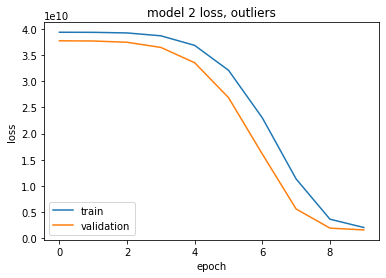

In [23]:
visualize_history(hist, 'model 2 loss, outliers')

In [24]:
f"Score: {sqrt(mean_squared_error(y_test, model2.predict(X_test)))}"

'Score: 39965.835902716324'

##### Training with data containing no outliers

In [25]:
hist = model2.fit(X_train_no_outlier, y_train_no_outlier, validation_data=(X_test, y_test), epochs=75, verbose=0)

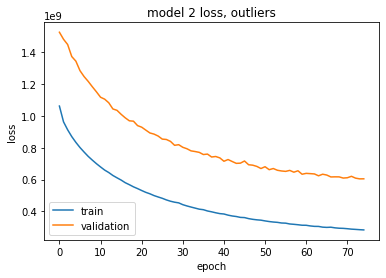

In [26]:
visualize_history(hist, 'model 2 loss, outliers')

In [27]:
f"Score: {sqrt(mean_squared_error(y_test, model2.predict(X_test)))}"

'Score: 24591.236139896417'

##### Model 3

In [28]:

model3 = Sequential()
model3.add(Dense(1024, input_dim=X_train.shape[1], activation='elu', kernel_regularizer=l2(0.01)))
model3.add(Dense(512, input_dim=(1024,), activation='elu', kernel_regularizer=l2(0.01)))
model3.add(Dense(256, input_dim=(512,), activation='elu', kernel_regularizer=l2(0.01)))
model3.add(Dense(128, input_dim=(256,), activation='elu', kernel_regularizer=l2(0.01)))
model3.add(Dense(64, input_dim=(128,), activation='elu', kernel_regularizer=l2(0.01)))
model3.add(Dense(32, input_dim=(64,), activation='elu', kernel_regularizer=l2(0.01)))
model3.add(Dense(16, input_dim=(32,), activation='elu', kernel_regularizer=l2(0.01)))
model3.add(Dense(8, input_dim=(16,), activation='elu', kernel_regularizer=l2(0.01)))
model3.add(Dense(4, input_dim=(8,), activation='elu', kernel_regularizer=l2(0.01)))
model3.add(Dense(2, input_dim=(4,), activation='elu', kernel_regularizer=l2(0.01)))
model3.add(Dense(1, input_shape=(2,), activation='linear'))

model3.compile(loss='mean_squared_error', optimizer='adam')
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1024)              277504    
_________________________________________________________________
dense_21 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_26 (Dense)             (None, 16)               

##### Training with data containing outliers

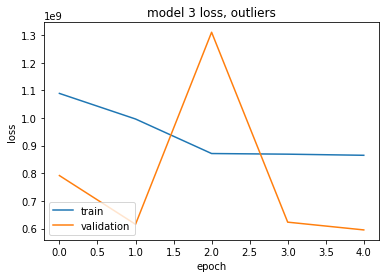

In [37]:
hist = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, verbose=0)
visualize_history(hist, 'model 3 loss, outliers')

In [30]:
f"Score: {sqrt(mean_squared_error(y_test, model3.predict(X_test)))}"

'Score: 30353.682049215786'


##### Training with data containing no outliers

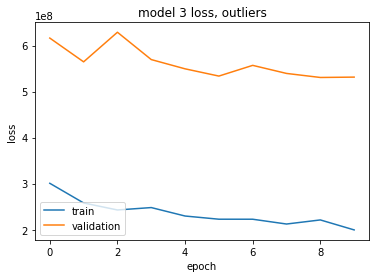

In [38]:
hist = model3.fit(X_train_no_outlier, y_train_no_outlier, validation_data=(X_test, y_test), epochs=10, verbose=0)
visualize_history(hist, 'model 3 loss, outliers')

In [32]:
f"Score: {sqrt(mean_squared_error(y_test, model3.predict(X_test)))}"

'Score: 24645.439559550323'

<hr/>

#### Submitting the best model's predictions


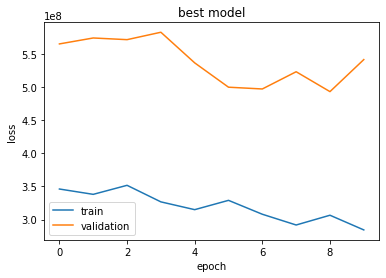

In [33]:
hist = model3.fit(kaggle_train_X_no_outlier, kaggle_train_y_no_outlier, validation_data=(X_test, y_test), epochs=10, verbose=0)
visualize_history(hist, "best model")

In [34]:
out = pd.DataFrame({
    'Id': kaggle_test_X.index,
    'SalePrice': model2.predict(kaggle_test_X).flatten()
})
out.head()

,Id,SalePrice
0,1461,125942.289062
1,1462,163875.187500
2,1463,179967.609375
3,1464,189546.546875
4,1465,198019.531250


In [35]:
out.to_csv("../out/submission_nns.csv", index=None)

The best model got a score of 0.14720 on the kaggle competition

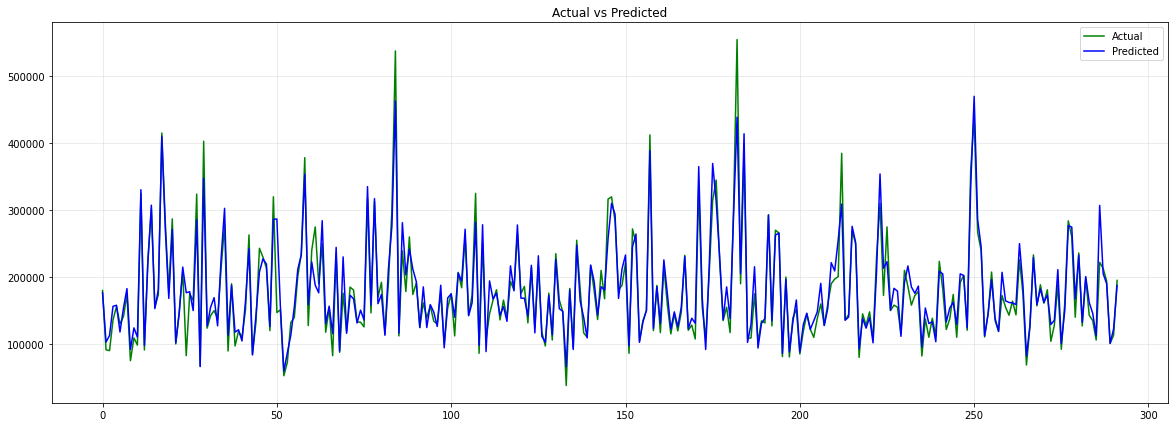

In [44]:

pred = model3.predict(X_test)

plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(pred, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.title('Actual vs Predicted')
plt.legend()
plt.rcParams["figure.figsize"] = (20, 7)
plt.show()